<a href="https://colab.research.google.com/github/mpt777/Math215/blob/main/Lab10_Eigenvector_centrality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab 10 - Networks and eigenvector centrality**

Enter your code in the spaces provided. Do not change any of the variable names or function names that are already provided for you. In places where we specify the name of the return value, make sure that your code produces the a value with the correct name.

In [ ]:
# Do not edit this cell.

LabID="Lab10"

try:
  from graderHelp import ISGRADEPLOT
except ImportError:
  ISGRADEPLOT = True

**Enter your name, section number, and BYU NetID**

In [ ]:
# Enter your first and last names in between the quotation marks.

first_name="Marshal"

last_name="Taylor"

# Enter your Math 215 section number in between the quotation marks. 

section_number="001"  

# Enter your BYU NetID in between the quotation marks.  NOT YOUR BYU ID NUMBER! 

BYUNetID="mpt777"  

**Import and visualize the data**

The simplest way to load the data into Colab is to first download it as a .csv file to your local computer by clicking the link

https://drive.google.com/uc?export=download&id=1J8IirxuOT0vLp2jl-yIitFCqVX71XzsN

This will allow you to download the data as a .csv file.  In the top left corner of this screen you should see a little file folder icon.   Selecting it opens a new window to the left of the notebook with three tabs: "Upload", "Refresh", and "Mount Drive". Select "Upload".  This should bring up a window that allows you to select the file "Lab10webpagedata.csv" from your local machine, which will upload the file to your notebook.  You will need to do this again if you decide to close your notebook and reopen it at a later time.

Once you've uploaded your file, convert it to a NumPy array called "webpage_data" by executing the following cell.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('Lab10webpagedata.csv')
webpagedata=df.values
webpage_data=np.array(webpagedata)

Execute the following cell to visualize the network.

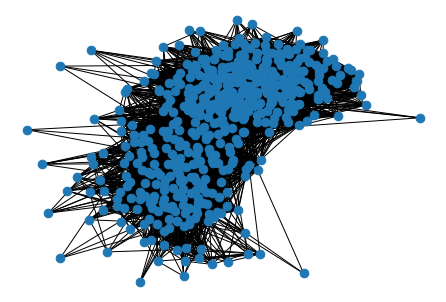

In [ ]:
import networkx as nx
edges=[(i[0],i[1]) for i in webpagedata]
G=nx.from_edgelist(edges)
nx.draw(G,node_size=75)

**Problem 1**

In [ ]:
def adj_matrix(n,edge_list): 
  # Put your code here.
  A = np.zeros((n,n))
  for i in range(len(edge_list)):
    A[edge_list[i, 0], edge_list[i, 1]] += 1
  return A# Put your return value here. 

In [ ]:
# Use E1 to test your function.
E1=np.array([[0,1],[1,4],[0,2],[0,4],[1,3],[2,0],[2,4],[3,4],[3,2],[3,2]])
adj_matrix(5, E1)

array([[0., 1., 1., 0., 1.],
       [0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 2., 0., 1.],
       [0., 0., 0., 0., 0.]])

**Problem 2**

In [ ]:
def degree_cent(n,edge_list):
  # Put your code here.
  A = adj_matrix(n,edge_list)
  B = np.zeros(n)
  for i in range(n):
    B[i] = np.sum(A[:,i])
  return B # Put your return value here. 

**Problem 3**

In [ ]:
# Save the value you obtain in Problem 3 as the variable top_indegree.

top_indegree=np.flip(degree_cent(499, webpage_data).argsort(), 0)[0]

**Problem 4**

In [ ]:
def stoch_mat(A):
  # Put your code here.
  n = len(A[0,:])
  At = np.transpose(A)
  A2 = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      A2[j,i] = (At[j,i] * 1.0) / np.sum(At[:,i])
  return A2# Put your return value here. 

In [ ]:
# Use A2 to test your function. 

A2= np.array([[0,1,0,0,0,0,0,0],
 [0,0,1,0,0,0,0,0],
 [1,0,0,1,0,1,1,0],
 [0,0,0,0,1,1,0,0],
 [1,0,1,0,0,0,0,0],
 [1,0,0,0,0,0,0,0],
 [0,0,0,0,0,1,0,1],
 [1,0,0,0,0,0,0,0]])

stoch_mat(A2)

array([[0.  , 0.  , 0.25, 0.  , 0.5 , 1.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.5 , 0.  , 0.  , 0.5 , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  ]])

**Problem 5**

In [ ]:
def stoch_eig(P,k):
  # Put your code here.
  n = len(P)
  A = np.zeros((n))
  for i in range(n):
    A[i] = 1.0/n 
  A2 = A
  for i in range(k):
    A = np.dot(P, A2)
    A2 = A
  return A # Put your return value here. 

**Problem 6**

In [ ]:
def PageRank_cent(n,edge_list,k):
  # Put your code here.
  A=adj_matrix(n,edge_list)
  P=stoch_mat(A)
  D=stoch_eig(P,k)
  return D # Put your return value here. 

**Problem 7**

In [ ]:
# Save the value you obtain in Problem 7 as the variable top_PageRank.

top_PageRank= np.flip(PageRank_cent(499, webpage_data, 100).argsort(), 0)[0]

**STOP!  BEFORE YOU SUBMIT THIS LAB:**  Go to the "Runtime" menu at the top of this page, and select "Restart and run all".  If any of the cells produce error messages, you will either need to fix the error(s) or delete the code that is causing the error(s).  Then use "Restart and run all" again to see if there are any new errors.  Repeat this until no new error messages show up.   

**You are not ready to submit until you are able to select "Restart and run all" without any new error messages showing up.  Your code will not be able to be graded if there are any error messages.**

To submit your lab for grading you must first download it to your compute as .py file. In the "File" menu select "Download .py". The resulting file can then be uploaded to http://www.math.byu.edu:30000 for grading.